Attribute Information:

Listing of attributes:

>50K, <=50K.

**age**: continuous.
**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
**fnlwgt**: continuous.
**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
**education**-**num**: continuous.
**marital**-**status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
**sex**: Female, Male.
**capital**-**gain**: continuous.
**capital**-**loss**: continuous.
**hours**-**per**-**week**: continuous.
**native**-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/adult.data',sep=',')

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARTIAL,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPTIAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARTIAL         32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPTIAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE-COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#check null value in data
df.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARTIAL           0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPTIAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE-COUNTRY    0
INCOME            0
dtype: int64

In [ ]:
df['WORKCLASS'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WORKCLASS, dtype: int64

In [ ]:
x = df['WORKCLASS'].unique()
k=x[5]
df['WORKCLASS'] = df['WORKCLASS'].replace(k,'unknown')

In [ ]:
df['OCCUPATION'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: OCCUPATION, dtype: int64

In [ ]:
x = df['OCCUPATION'].unique()
k=x[11] 
df['OCCUPATION'] = df['OCCUPATION'].replace(k,'unknown')

In [ ]:
# Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.

df['MARTIAL'].value_counts()  

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: MARTIAL, dtype: int64

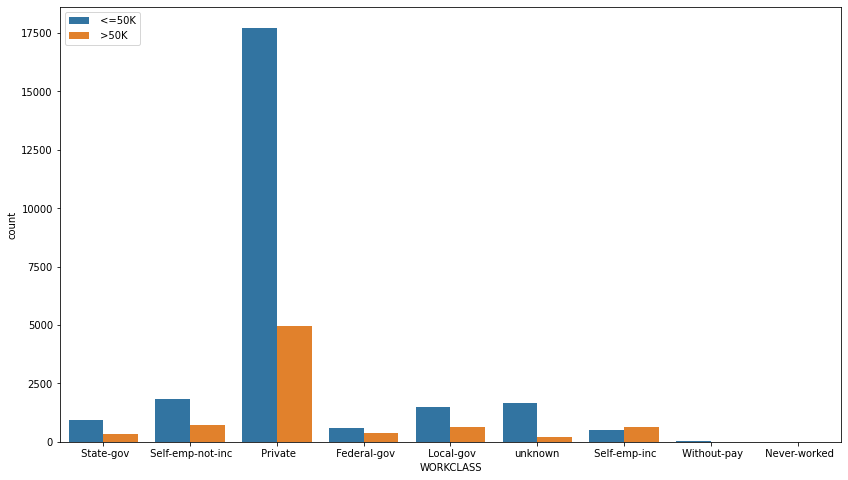

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='WORKCLASS',data=df,hue='INCOME') 
plt.legend()

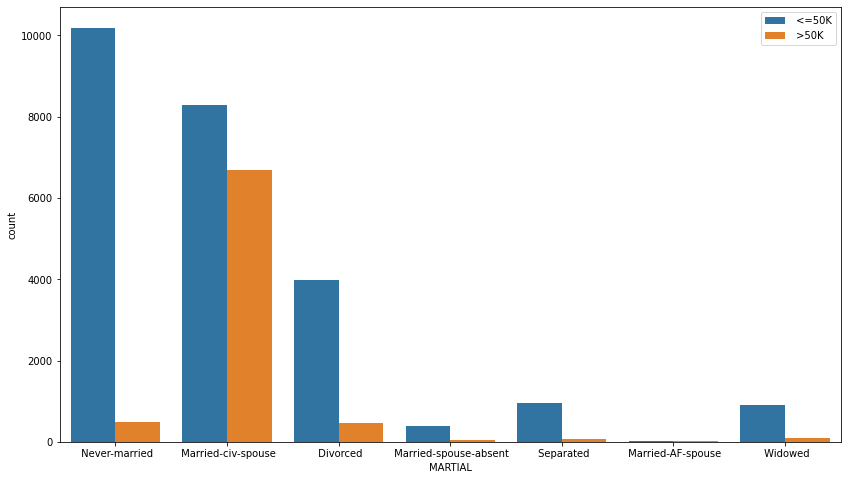

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='MARTIAL',data=df,hue='INCOME') 
plt.legend()

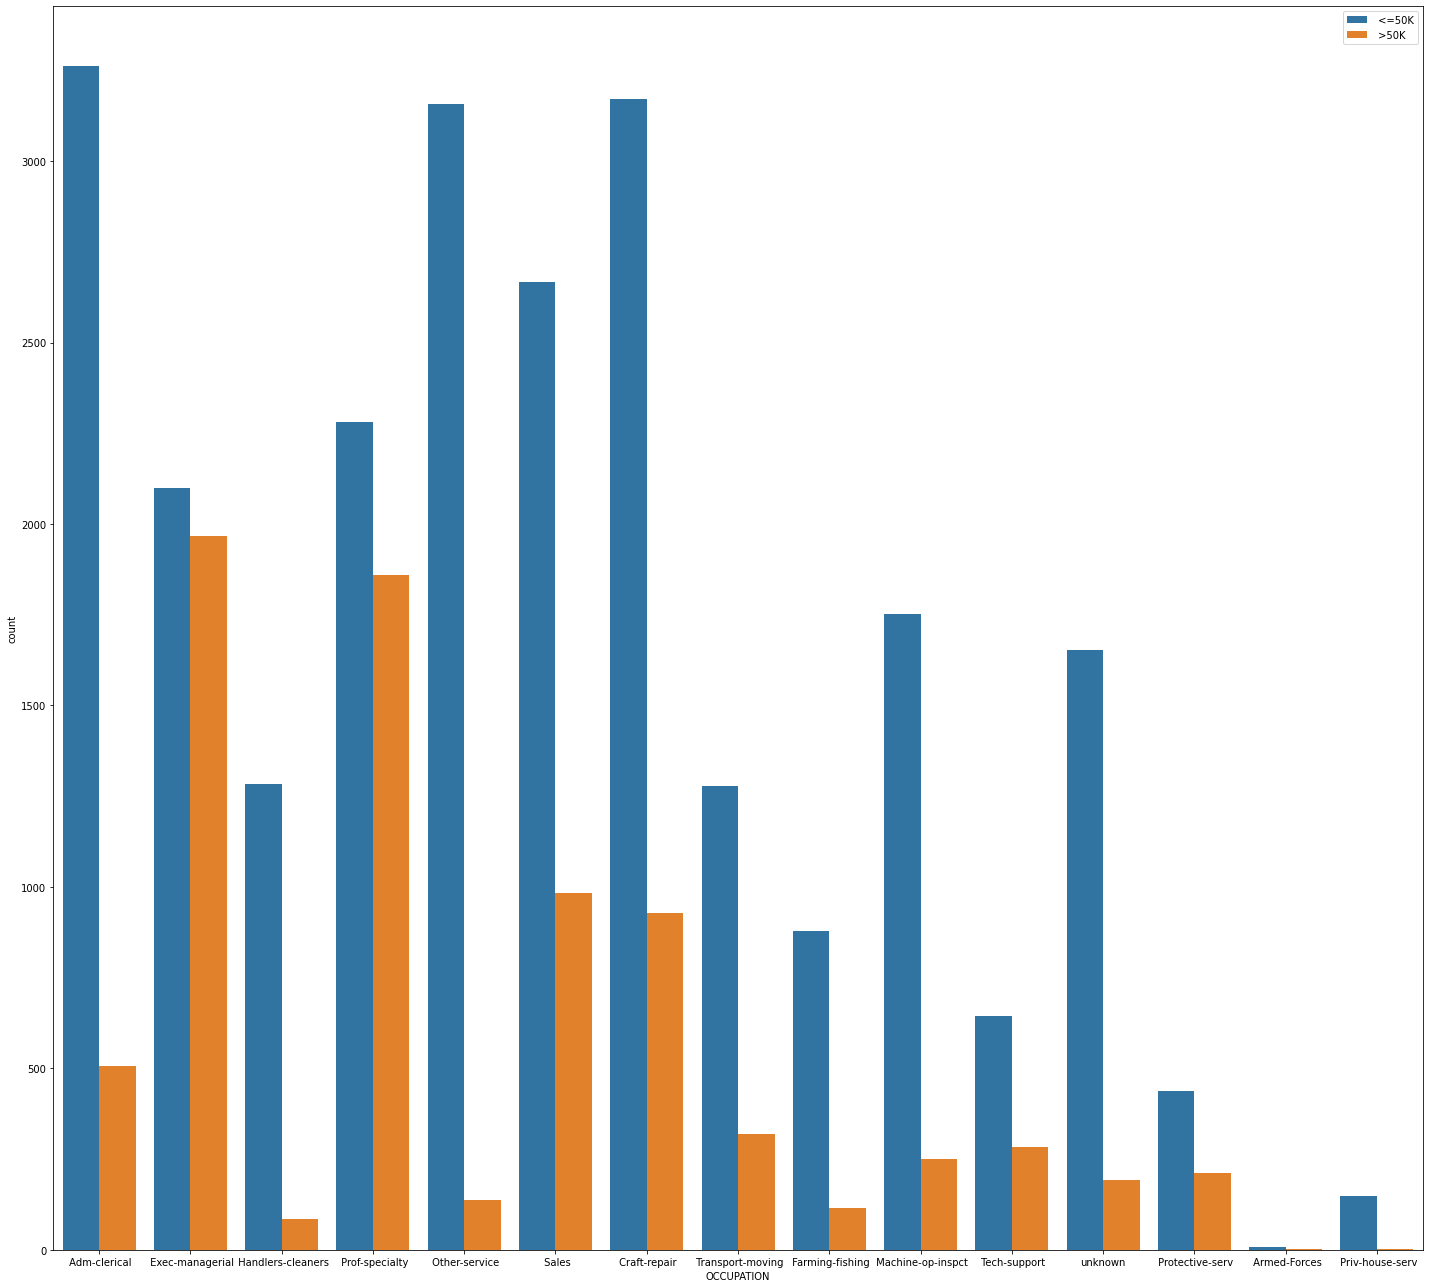

In [ ]:
plt.figure(figsize=(20,18))
sns.countplot(x='OCCUPATION',data=df,hue='INCOME') 
plt.legend() 
plt.tight_layout()

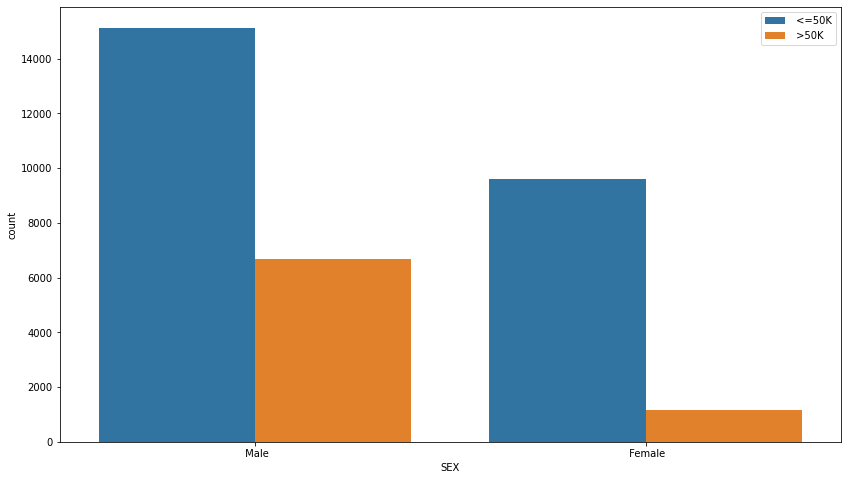

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='SEX',data=df,hue='INCOME') 
plt.legend()

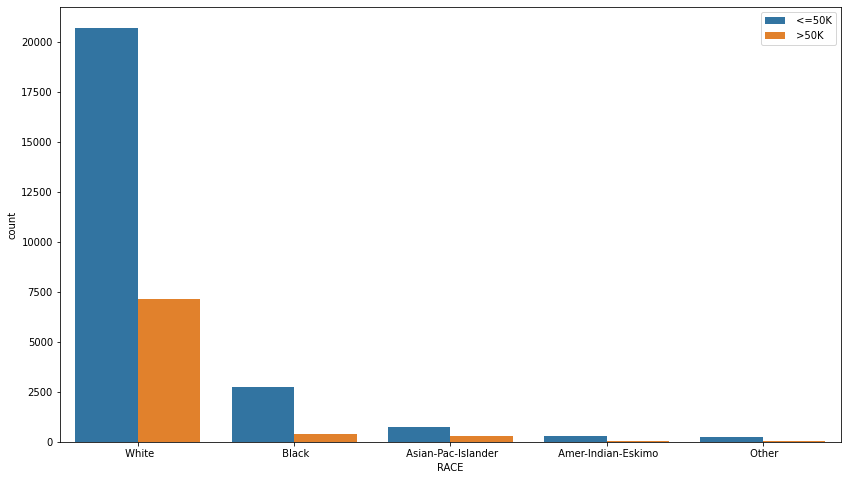

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='RACE',data=df,hue='INCOME') 
plt.legend()

In [ ]:
X = df.drop('INCOME',axis=1) 
y = df['INCOME']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
s = (X_train.dtypes=='object') 
object_cols = list(s[s].index) 
print('categorical variables') 
print(object_cols) 

categorical variables
['WORKCLASS', 'EDUCATION', 'MARTIAL', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'NATIVE-COUNTRY']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder  

label_X_train = X_train.copy() 
label_X_test  = X_test.copy() 

ordinal_encoder = OrdinalEncoder() 
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols]) 
label_X_test[object_cols]  = ordinal_encoder.transform(X_test[object_cols])
label_X_train.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARTIAL,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPTIAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY
20895,22,3.0,129508,11.0,9,4.0,0.0,3.0,4.0,0.0,0,0,28,39.0
3384,47,3.0,151267,11.0,9,2.0,6.0,5.0,2.0,0.0,15024,0,40,39.0
1832,46,1.0,272780,15.0,10,2.0,9.0,0.0,4.0,1.0,0,0,24,39.0
18919,46,6.0,314770,15.0,10,0.0,0.0,4.0,4.0,0.0,0,0,48,39.0
31685,60,3.0,389254,11.0,9,2.0,0.0,0.0,4.0,1.0,0,0,40,39.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix 

for i in [5,50,500,5000,30000]:
  dt  = DecisionTreeClassifier(max_leaf_nodes=i) 
  dt.fit(label_X_train,y_train) 
  y_pred = dt.predict(label_X_test)  
  acc = accuracy_score(y_test,y_pred) 
  print(f'{confusion_matrix(y_test,y_pred)}, accuracy : {acc}') 
  print()
print(classification_report(y_test, y_pred))

[[7107  329]
 [1198 1135]], accuracy : 0.8436892210052206

[[6962  474]
 [ 880 1453]], accuracy : 0.8613983007472618

[[6870  566]
 [ 854 1479]], accuracy : 0.8546422356433616

[[6458  978]
 [ 814 1519]], accuracy : 0.8165625959668339

[[6419 1017]
 [ 806 1527]], accuracy : 0.8133892926604566

              precision    recall  f1-score   support

       <=50K       0.89      0.86      0.88      7436
        >50K       0.60      0.65      0.63      2333

    accuracy                           0.81      9769
   macro avg       0.74      0.76      0.75      9769
weighted avg       0.82      0.81      0.82      9769



In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf =RandomForestClassifier(random_state=0,oob_score=True) 
rf.fit(label_X_train,y_train) 
y_pred2 = rf.predict(label_X_test) 
acc = accuracy_score(y_test,y_pred2) 
print('accuracy : ',acc) 
print(classification_report(y_test, y_pred2))

accuracy :  0.8592486436687481
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7436
        >50K       0.74      0.63      0.68      2333

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.86      9769



In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(label_X_train,y_train) 
y_pred3=lr.predict(label_X_test) 
acc = accuracy_score(y_test,y_pred3) 
print('accuracy : ',acc)
print(classification_report(y_test, y_pred3))

accuracy :  0.806223769065411
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7436
        >50K       0.75      0.28      0.41      2333

    accuracy                           0.81      9769
   macro avg       0.78      0.63      0.65      9769
weighted avg       0.80      0.81      0.77      9769



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5) 
model.fit(label_X_train,y_train) 
y_pred4 = model.predict(label_X_test) 
acc = accuracy_score(y_test,y_pred4) 
print('accuracy : ' ,acc) 
print(classification_report(y_test, y_pred4))

accuracy :  0.7771522161940834
              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86      7436
        >50K       0.56      0.32      0.41      2333

    accuracy                           0.78      9769
   macro avg       0.69      0.62      0.64      9769
weighted avg       0.75      0.78      0.75      9769



Text(0, 0.5, 'Mean Error')

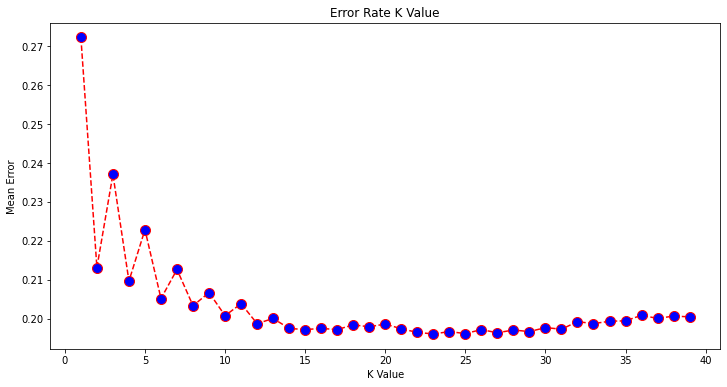

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(label_X_train, y_train)
    pred_i = knn.predict(label_X_test)
    error.append(np.mean(pred_i != y_test)) 


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')    

In [ ]:
accuracies=[]
nns=[]     
for i in range(10,40):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(label_X_train,y_train) 
  y_pred5 = knn.predict(label_X_test) 
  acc = accuracy_score(y_test,y_pred5) 
  accuracies.append(acc) 
  nns.append(i)



In [ ]:
print('clearly we can see that at k=15 we have the highest accuracy for algo : {}'.format(max(accuracies)))

clearly we can see that at k=15 we have the highest accuracy for algo : 0.8039717473641109


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(label_X_train, y_train)
y_pred5 = knn.predict(label_X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred2)) #random forest
print() 
print(confusion_matrix(y_test,y_pred3)) #logistic
print() 
print(confusion_matrix(y_test,y_pred5)) #knn at k=15
print() 

[[6916  520]
 [ 855 1478]]

[[7214  222]
 [1671  662]]

[[7295  141]
 [1785  548]]

